In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

MUAT DATA

In [5]:
train_df = pd.read_csv("data/data_train.csv")
test_df = pd.read_csv("data/data_test.csv")

PISAHKAN ANTARA FITUR DAN TARGET ATAU "KELAYAKAN"

In [6]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

LATIH DATA DENGAN MODEL KNN DAN RANDOM FOREST

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

PREDIKSI DAN EVALUASI METODE KNN

🔸 KNN Accuracy: 86.84%


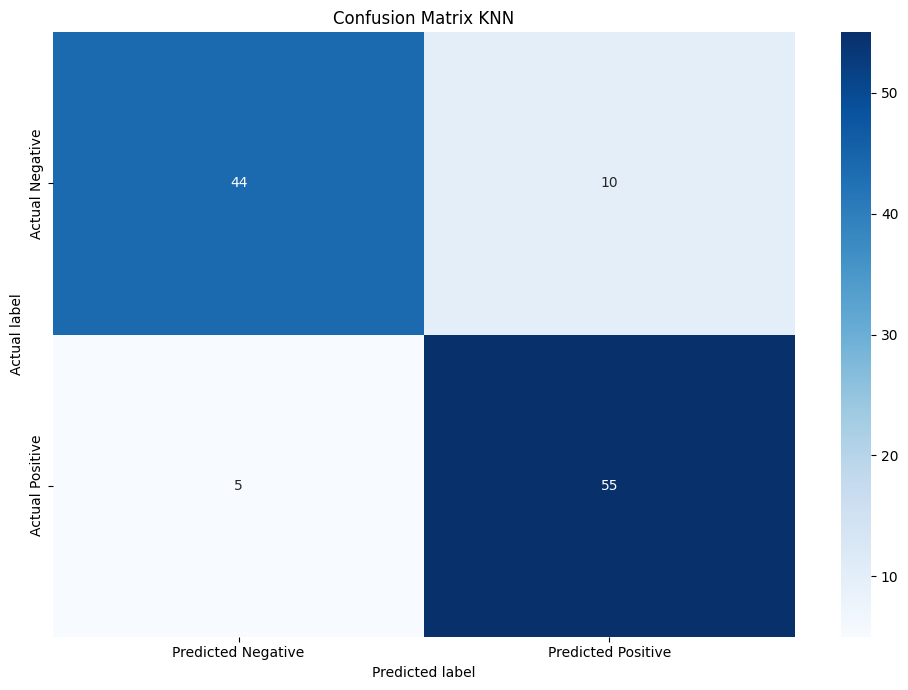

Confusion Matrix Metode KNN:
                 Predicted Negative  Predicted Positive
Actual Negative                  44                  10
Actual Positive                   5                  55
------------------------------------------------

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85        54
           1       0.85      0.92      0.88        60

    accuracy                           0.87       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



In [18]:
# Prediksi
y_pred_knn = knn.predict(X_test)

# Evaluasi akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("🔸 KNN Accuracy:", f'{accuracy_knn:.2%}')

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
class_labels = ['Negative', 'Positive']
cm_df_knn = pd.DataFrame(
    cm_knn, 
    index=[f'Actual {label}' for label in class_labels],
    columns=[f'Predicted {label}' for label in class_labels]
    )

# Buat Gambar (Plot Heatmap)
plt.figure(figsize=(10,7))
sns.heatmap(cm_df_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Cetak confusion matrix sebagai DataFrame
print('Confusion Matrix Metode KNN:')
print(cm_df_knn)
print('------------------------------------------------')

# Classification Report
print("\nClassification Report - KNN:\n", classification_report(y_test, y_pred_knn))

PREDIKSI DAN EVALUASI METODE RANDOM FOREST

🔸 Random Forest Accuracy: 88.60%


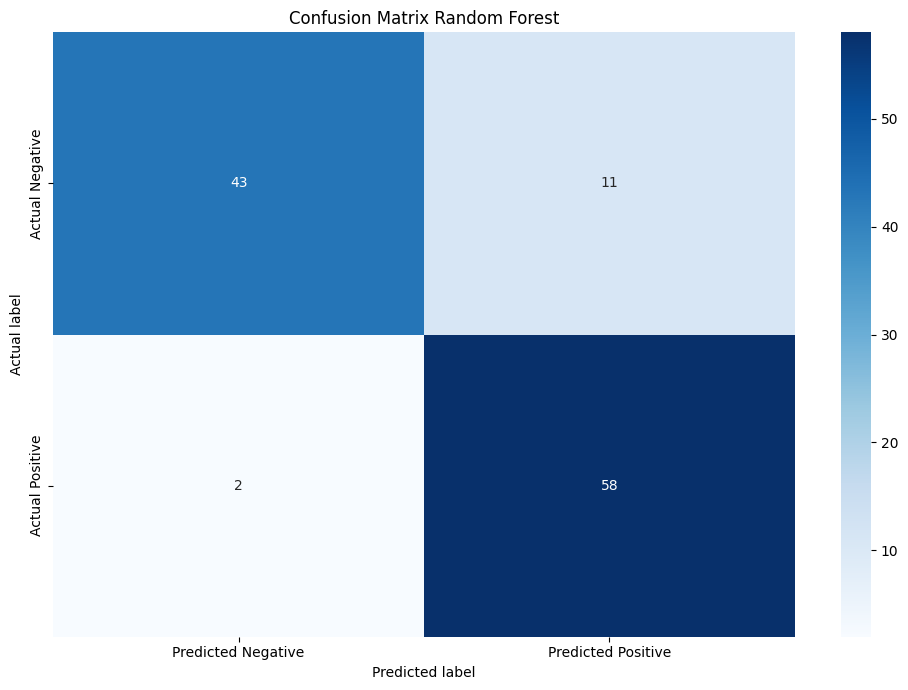

Confusion Matrix Metode RF:
                 Predicted Negative  Predicted Positive
Actual Negative                  43                  11
Actual Positive                   2                  58
------------------------------------------------

Classification Report - RF:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87        54
           1       0.84      0.97      0.90        60

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.88       114
weighted avg       0.90      0.89      0.88       114



In [19]:
# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("🔸 Random Forest Accuracy:", f'{accuracy_rf:.2%}')

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
class_labels = ['Negative', 'Positive']
cm_df_rf = pd.DataFrame(
    cm_rf, 
    index=[f'Actual {label}' for label in class_labels],
    columns=[f'Predicted {label}' for label in class_labels]
    )

# Buat Gambar (Plot Heatmap)
plt.figure(figsize=(10,7))
sns.heatmap(cm_df_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Cetak confusion matrix sebagai DataFrame
print('Confusion Matrix Metode RF:')
print(cm_df_rf)
print('------------------------------------------------')

# Classification Report
print("\nClassification Report - RF:\n", classification_report(y_test, y_pred_rf))

SIMPAN KEDUA MODEL YANG TELAH DILATIH

In [20]:
joblib.dump(knn, "knn_model.pkl")
joblib.dump(rf, "rf_model.pkl")

print("Model berhasil disimpan.")

Model berhasil disimpan.
